In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle("./data/cve")

In [4]:
df.columns

Index(['cve_id', 'attack_vector', 'attack_complexity', 'privileges_required',
       'user_interaction', 'scope', 'confidentiality', 'integrity',
       'availability', 'description', 'last_modified_date', 'published_date',
       'base_score', 'exploitability_score', 'impact_score'],
      dtype='object')

In [7]:
test_df = df[120000:]

In [8]:
test_df.head()

,cve_id,attack_vector,attack_complexity,privileges_required,user_interaction,scope,confidentiality,integrity,availability,description,last_modified_date,published_date,base_score,exploitability_score,impact_score
120000,CVE-2020-15863,LOCAL,HIGH,LOW,NONE,CHANGED,LOW,LOW,LOW,hw/net/xgmac.c in the XGMAC Ethernet controlle...,2023-11-07T03:17:56.230,2020-07-28T16:15:12.777,5.3,1.1,3.7
120001,CVE-2020-15900,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,A memory corruption issue was found in Artifex...,2023-11-07T03:17:56.597,2020-07-28T16:15:12.840,9.8,3.9,5.9
120002,CVE-2020-16094,NETWORK,LOW,NONE,NONE,UNCHANGED,NONE,NONE,HIGH,In imap_scan_tree_recursive in Claws Mail thro...,2023-11-07T03:18:03.130,2020-07-28T19:15:12.267,7.5,3.9,3.6
120003,CVE-2020-16135,NETWORK,HIGH,NONE,NONE,UNCHANGED,NONE,NONE,HIGH,libssh 0.9.4 has a NULL pointer dereference in...,2023-11-07T03:18:12.213,2020-07-29T21:15:13.507,5.9,2.2,3.6
120004,CVE-2020-16166,NETWORK,HIGH,NONE,NONE,UNCHANGED,LOW,NONE,NONE,The Linux kernel through 5.7.11 allows remote ...,2023-11-07T03:18:13.100,2020-07-30T21:15:11.533,3.7,2.2,1.4


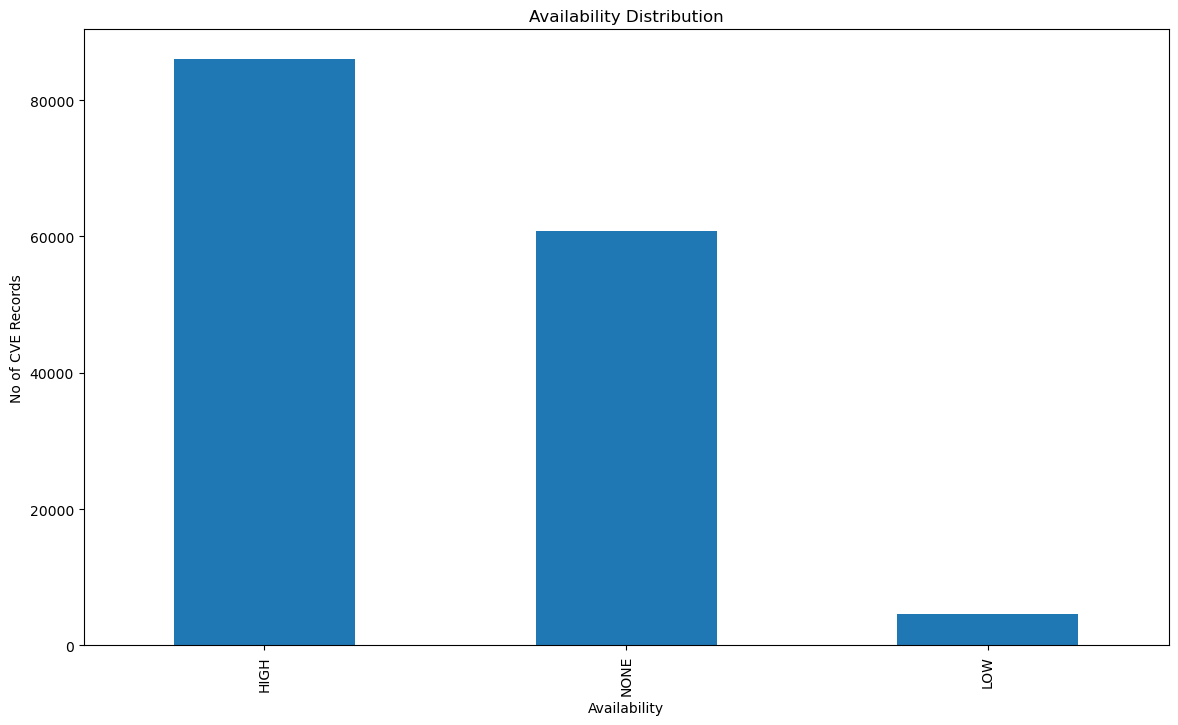

In [9]:
ax = df['availability'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Availability Distribution")
ax.set_xlabel("Availability")
ax.set_ylabel("No of CVE Records")
plt.show()

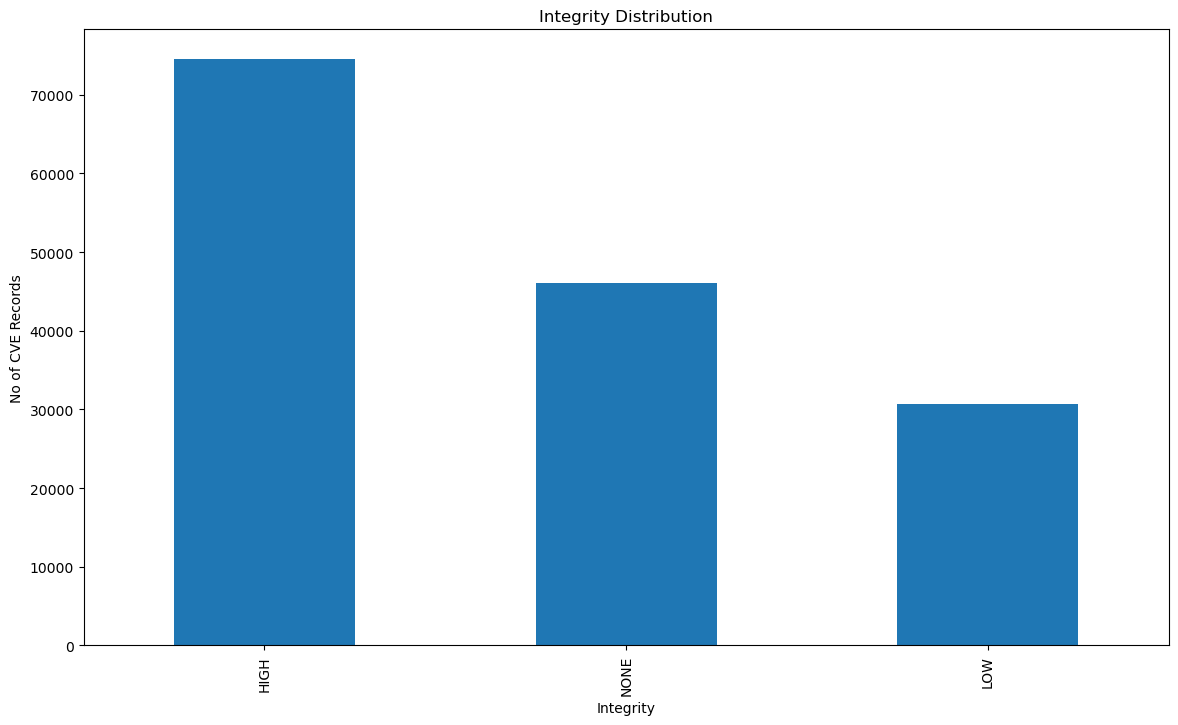

In [15]:
ax = df['integrity'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Integrity Distribution")
ax.set_xlabel("Integrity")
ax.set_ylabel("No of CVE Records")
plt.show()

In [10]:
df['base_range'] = pd.cut(df['base_score'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10'])

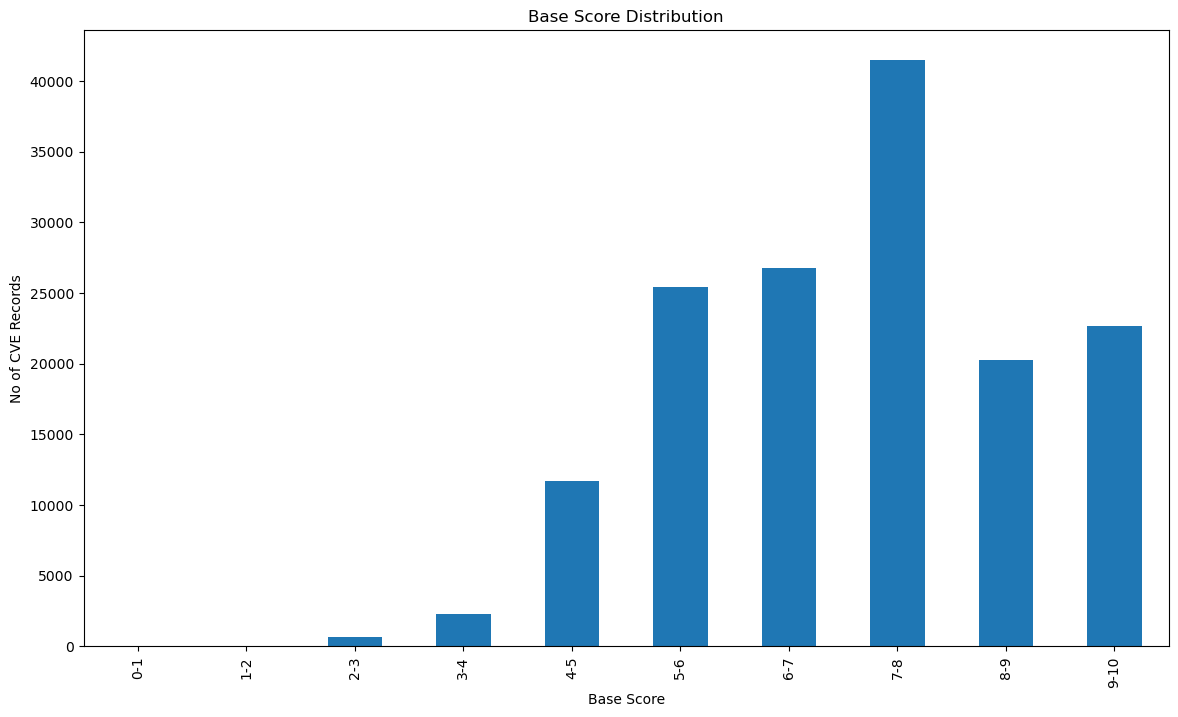

In [11]:
ax2 = df['base_range'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Base Score Distribution")
ax2.set_xlabel("Base Score")
ax2.set_ylabel("No of CVE Records")
plt.show()

In [12]:
df['severity'] = pd.cut(df['base_score'], [0, 0.1, 4, 7, 9, 10], 
                       labels=['NONE', 'LOW', 'MEDIUM', 'HIGH', 'CRITICAL'])

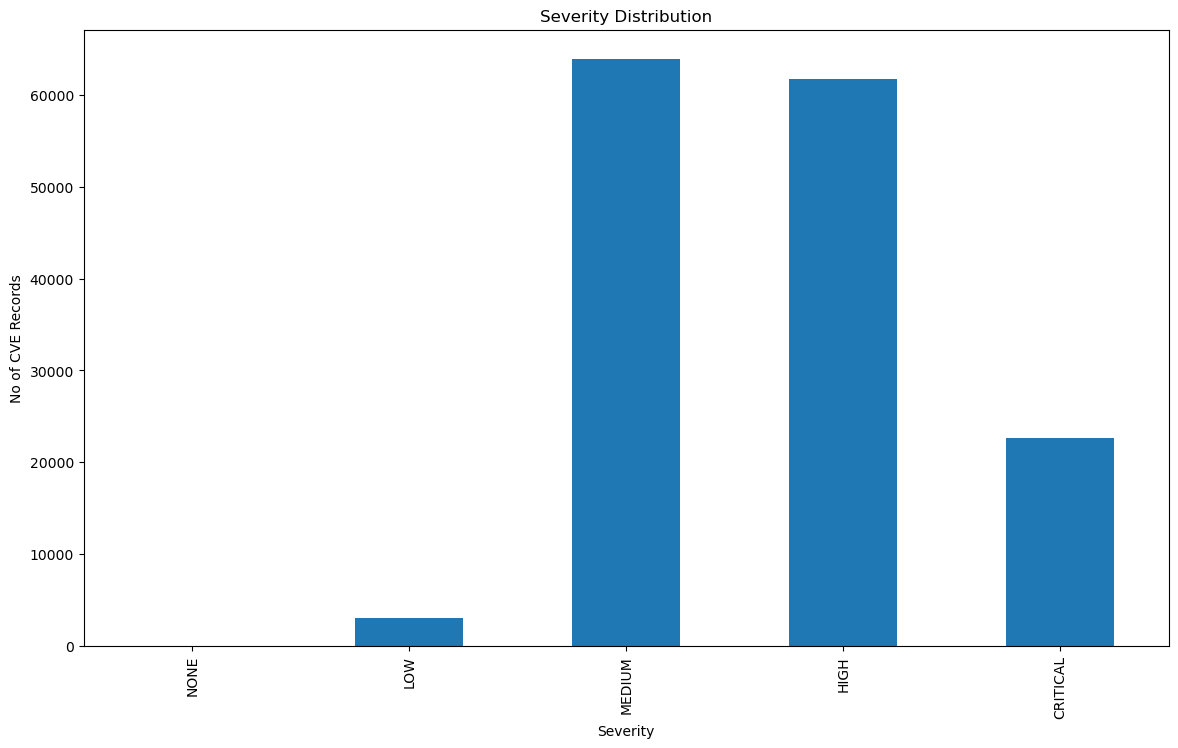

In [13]:
ax2 = df['severity'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Severity Distribution")
ax2.set_xlabel("Severity")
ax2.set_ylabel("No of CVE Records")
plt.show()

In [14]:
metrics = ['attack_vector', 'attack_complexity', 'privileges_required',
       'user_interaction', 'scope', 'confidentiality', 'integrity',
       'availability', ]

In [18]:
res_df = pd.DataFrame()

In [19]:
for metric in metrics:
    df1 = pd.read_csv(f"./{metric}_model/{metric}_predictions.csv").reset_index()
    df1.columns = ["id", f"{metric}_true", f"{metric}_predicted", f"{metric}_correct", "Text"]
    df1.drop(labels="Text", axis=1, inplace=True)
    if len(res_df) == 0:
        res_df = df1.copy()
    else:
       res_df = df1.merge(res_df, on="id", how="inner")

In [20]:
res_df.head()

,id,availability_true,availability_predicted,availability_correct,integrity_true,integrity_predicted,integrity_correct,confidentiality_true,confidentiality_predicted,confidentiality_correct,...,user_interaction_correct,privileges_required_true,privileges_required_predicted,privileges_required_correct,attack_complexity_true,attack_complexity_predicted,attack_complexity_correct,attack_vector_true,attack_vector_predicted,attack_vector_correct
0,0,LOW,HIGH,False,LOW,HIGH,False,LOW,HIGH,False,...,True,LOW,LOW,True,HIGH,LOW,False,LOCAL,NETWORK,False
1,1,HIGH,HIGH,True,HIGH,HIGH,True,HIGH,HIGH,True,...,True,NONE,NONE,True,LOW,LOW,True,NETWORK,NETWORK,True
2,2,HIGH,HIGH,True,NONE,NONE,True,NONE,NONE,True,...,True,NONE,NONE,True,LOW,LOW,True,NETWORK,NETWORK,True
3,3,HIGH,HIGH,True,NONE,NONE,True,NONE,NONE,True,...,False,NONE,NONE,True,HIGH,LOW,False,NETWORK,NETWORK,True
4,4,NONE,NONE,True,NONE,NONE,True,LOW,LOW,True,...,True,NONE,NONE,True,HIGH,LOW,False,NETWORK,NETWORK,True


In [22]:
res_df.columns

Index(['id', 'availability_true', 'availability_predicted',
       'availability_correct', 'integrity_true', 'integrity_predicted',
       'integrity_correct', 'confidentiality_true',
       'confidentiality_predicted', 'confidentiality_correct', 'scope_true',
       'scope_predicted', 'scope_correct', 'user_interaction_true',
       'user_interaction_predicted', 'user_interaction_correct',
       'privileges_required_true', 'privileges_required_predicted',
       'privileges_required_correct', 'attack_complexity_true',
       'attack_complexity_predicted', 'attack_complexity_correct',
       'attack_vector_true', 'attack_vector_predicted',
       'attack_vector_correct'],
      dtype='object')

In [24]:
len(test_df), len(res_df)

(31365, 31365)

In [25]:
metrics_dict = res_df.to_dict(orient="records")

In [27]:
from scores import CVSScore
from scores_Copy1 import CVSScoreTrue

In [28]:
for metric in metrics_dict:
    b, i, e = CVSScore(metric).calculate_scores()
    metric["base_predicted"] = b
    metric["impact_predicted"] = i
    metric["exploitability_predicted"] = e

In [29]:
df2 = pd.DataFrame(metrics_dict)

In [30]:
df2.columns

Index(['id', 'availability_true', 'availability_predicted',
       'availability_correct', 'integrity_true', 'integrity_predicted',
       'integrity_correct', 'confidentiality_true',
       'confidentiality_predicted', 'confidentiality_correct', 'scope_true',
       'scope_predicted', 'scope_correct', 'user_interaction_true',
       'user_interaction_predicted', 'user_interaction_correct',
       'privileges_required_true', 'privileges_required_predicted',
       'privileges_required_correct', 'attack_complexity_true',
       'attack_complexity_predicted', 'attack_complexity_correct',
       'attack_vector_true', 'attack_vector_predicted',
       'attack_vector_correct', 'base_predicted', 'impact_predicted',
       'exploitability_predicted'],
      dtype='object')

In [60]:
df2['base_range'] = pd.cut(df2['base_predicted'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10'])

In [ ]:
test_df['base_range'] = pd.cut(test_df['base_score'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                               labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10'])

In [39]:
range_true = test_df["base_range"].to_numpy()
range_pred = df2["base_range"].to_numpy()

In [42]:
import numpy as np

In [54]:
ax1 = df2['base_range'].value_counts().sort_index()
ax2 = test_df['base_range'].value_counts().sort_index()

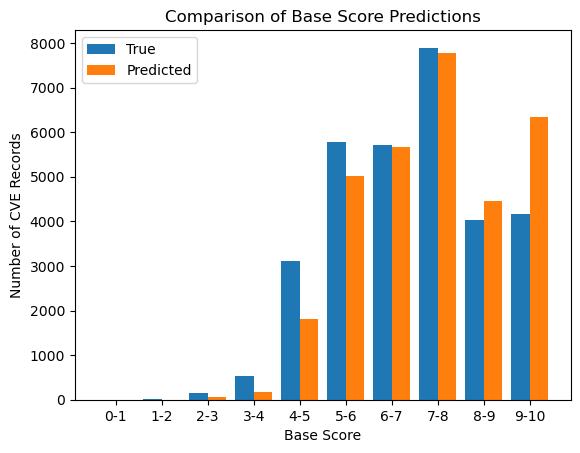

In [57]:
X_axis = np.arange(10)
X = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10'] 
range_true = [0,11,141,522,3102,5787,5705,7892,4038,4166] 
range_pred = [0,1,60,184, 1801, 5009, 5661, 7779, 4459, 6331] 

plt.bar(X_axis - 0.2, range_true, 0.4, label = 'True') 
plt.bar(X_axis + 0.2, range_pred, 0.4, label = 'Predicted') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Base Score") 
plt.ylabel("Number of CVE Records") 
plt.title("Comparison of Base Score Predictions") 
plt.legend() 
plt.show() 